Resources/raw data:

Quarterly - Statutory homelessness 2014-2015  
Quarterly - Statutory homelessness and prevention and relief 2015-2018  
Quarterly - Statutory homelessness 2018-present (till Dec 2021 (released march22)  
Annual report - Rrough sleeping 2010-2022  
Annual report - Homelessness prevention and relief 2010-2015  

DATA FROM 2010 - 2022 [link](https://www.gov.uk/government/collections/homelessness-statistics)

"LIVE" TABLES?? [link](https://www.gov.uk/government/statistical-data-sets/live-tables-on-homelessness)

In [1]:
raw_data_folder = '01 raw_data'
cleaned_data_folder = '02 cleaned_data'

In [2]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn-colorblind')

from get_files import get_files

# READ FIRST SHEETS (A1 sheet)

In [3]:
ods_files = get_files(raw_data_folder, ext='ods')
excel_files = get_files(raw_data_folder, ext='xlsx')

print('Loading files:')

data = []
for f in ods_files:
    print('.. ', f, end=' ..')
    data.append(pd.read_excel(f, engine='odf', sheet_name='A1', na_values='..'))
    print('done')
    

for f in excel_files:
    print('.. ', f, end=' ..')
    sheets = pd.read_excel(f,sheet_name=None).keys()
    a1_sheetname = [x for x in sheets if x.startswith('A1')][0]
    data.append(pd.read_excel(f, sheet_name=a1_sheetname, na_values='..'))
    print('done')
    

Loading files:
..  01 raw_data/DetailedLA_202003.ods ..done
..  01 raw_data/DetailedLA_202006.ods ..done
..  01 raw_data/DetailedLA_202009_REVISED.ods ..done
..  01 raw_data/DetailedLA_202012.ods ..done
..  01 raw_data/DetailedLA_202103_revised.ods ..done
..  01 raw_data/DetailedLA_202106.ods ..done
..  01 raw_data/DetailedLA_202109_fixed.ods ..done
..  01 raw_data/DetailedLA_202112.ods ..done
..  01 raw_data/Detailed_LA_202203.ods ..done
..  01 raw_data/DetailedLA_201806.xlsx ..

/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/hom

done
..  01 raw_data/DetailedLA_201809.xlsx ..

/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/hom

done
..  01 raw_data/DetailedLA_201812.xlsx ..

/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/hom

done
..  01 raw_data/DetailedLA_201903_revised.xlsx ..

/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/hom

done
..  01 raw_data/DetailedLA_201906_revised.xlsx ..

/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/hom

done
..  01 raw_data/DetailedLA_201909_revised.xlsx ..

/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/hom

done
..  01 raw_data/DetailedLA_201912.xlsx ..

/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/georgegoldberg/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/hom

done


In [4]:
len(excel_files) + len(ods_files)

16

CLEAN FIRST SHEETS (A1 SHEET)

In [7]:
# df_a1 = pd.read_excel("DetailedLA_202112.ods", engine="odf", sheet_name='A1',na_values='..')

cleaned_data = []

for d in data:
    df_a1 = d.copy()
    data_start = df_a1.iloc[:,0][df_a1.iloc[:,0] == 'E92000001'].index[0]
    notes_start = df_a1.iloc[:,0][df_a1.iloc[:,0] == 'Notes'].index[0]
    a1_sheet = df_a1.iloc[data_start : notes_start].copy()

    a1_sheet.dropna(how='all',axis=1,inplace=True)

    # format numeric fields
    for col in a1_sheet:
        try:
            a1_sheet[col] = a1_sheet[col].astype(float)
        except:
            pass
        
    # filter on numeric fields to remove the extra region fields
    a1_sheet = pd.concat([
        a1_sheet.iloc[:,:2], 
        a1_sheet.loc[:,a1_sheet.select_dtypes(include='float').columns[0]:]
    ], axis=1)

    col_names = ['LA_Code',
    'LA_Name',
    'Total number of households assessed1,2',
    'Total households assessed as owed a duty',
    'Threatened with homelessness - Prevention duty owed',
    'Of which: due to service of valid Section 21 Notice',
    'Homeless - Relief duty owed',
    'Not homeless nor threatened with homelessness within 56 days - no duty owed',
    'Number of households in area (000s)',
    'Households assessed as threatened with homelessnessper (000s)',
    'Households assessed as homelessper (000s)']

    includes_area_popn = True if len(
        [x for x in a1_sheet.iloc[1].values if str(x).strip().startswith("Number of households in area") and "000" in x]
    ) > 0 else False
    
    if len(a1_sheet.columns) == len(col_names):
        a1_sheet.columns = col_names
    elif not includes_area_popn and len(a1_sheet.columns) == (len(col_names) - 3):
        #if missing number of hh in area
        a1_sheet.columns = col_names[:-3]
    else:
        raise ValueError(f'Error: couldnt rename columns as sheet contains {len(a1_sheet.columns)} but you are trying to provide {len(col_names)} new names')
    
    # use the blank/null rows to locate positions of the countries, regions, authorities
    nulls = [x for x in a1_sheet.index if x not in a1_sheet.dropna(how='all').index]
    countries = a1_sheet.loc[:nulls[0]].dropna(how='all')
    regions = a1_sheet.loc[nulls[0]:nulls[1]].dropna(how='all')
    if len(nulls) <= 2:
        authorities = a1_sheet.loc[nulls[1]:].dropna(how='all')
    else:
        authorities = a1_sheet.loc[nulls[1]:nulls[2]].dropna(how='all')
    
    # label region agg type
    countries['region_type'] = '1 countries'
    regions['region_type'] = '2 regions'
    authorities['region_type'] = '3 authorities'
    
    # rejoin aggregations
    output_df = pd.concat([countries, regions, authorities])
    
    # add date field
    # extract report date: should be after the comma in the first field
    report_dt_range = df_a1.columns[0].split(',')[-1].strip()
    end_month_str = report_dt_range.split('to ')[-1]
    end_dt = pd.Timestamp(end_month_str).to_period('M').to_timestamp('M').strftime('%Y-%m-%d')
    start_dt = (pd.Timestamp(end_month_str) - pd.Timedelta(days=35)).strftime('%Y-%m-01')
    
    output_df['period_start'] = start_dt
    output_df['period_end'] = end_dt
    output_df['period_length'] = '3 months'
    
    # reorder columns
    output_df = pd.concat([output_df.loc[:,'region_type':], output_df.loc[:,:'region_type'].drop(columns='region_type') ],axis=1)
#     output_df[['region_type','period_start','period_end','period_length'] + list(output_df.columns[:-3])]
    
    # send to list for aggregation:
    cleaned_data.append(output_df)
    
    # export as file
    from pathlib import Path
    
    export_path = Path(cleaned_data_folder,start_dt+'_to_'+end_dt+'.csv')
    
    # export
    output_df.to_csv(export_path, index=False)

In [9]:
joined = pd.concat(cleaned_data,ignore_index=True)

# format dates and strings
for col in joined.select_dtypes('object'):
    # dates
    if joined[col].apply(lambda x:True if len(x) == 10 and x[4]=='-' and x[7]=='-' else False).sum() > 0:
        joined[col] = pd.to_datetime(joined[col]).dt.date

    # strings
    else:
        joined[col] = joined[col].str.strip().str.title()
        
# sort fields hierarchically
joined = joined.sort_values(['period_end','region_type','LA_Code']).reset_index().drop(columns='index')
joined.head(3)

,region_type,period_start,period_end,period_length,LA_Code,LA_Name,"Total number of households assessed1,2",Total households assessed as owed a duty,Threatened with homelessness - Prevention duty owed,Of which: due to service of valid Section 21 Notice,Homeless - Relief duty owed,Not homeless nor threatened with homelessness within 56 days - no duty owed,Number of households in area (000s),Households assessed as threatened with homelessnessper (000s),Households assessed as homelessper (000s)
0,1 Countries,2018-04-01,2018-06-30,3 Months,-,Rest Of England,54230.0,48630.0,27380.0,4230.0,21240.0,5610.0,NaN,NaN,NaN
1,1 Countries,2018-04-01,2018-06-30,3 Months,E12000007,London,13600.0,12590.0,7560.0,870.0,5030.0,1010.0,NaN,NaN,NaN
2,1 Countries,2018-04-01,2018-06-30,3 Months,E92000001,England,67830.0,61210.0,34940.0,5100.0,26270.0,6620.0,NaN,NaN,NaN


In [10]:

def get_survey_results(df, la_name='England'):
    """Important consideration:
    These figures are based on those that applied for prevention or homelessness relief duty.
    There could be many others that did not apply for whatever reason - eg:
        distrust of local authorities, 
        access to medical care forms/the means/knowhow to get the forms etc
        fears around immigration status that might be triggered when filling out the form
        etc etc
    
    We should look at other factors to understand the true number of homeless too.eg:
        street surveys.
        charity estimates
        food bank surveys?
    """
    
    renamed = df.rename(columns={
        'Threatened with homelessness - Prevention duty owed':'applicant at risk',
        'Homeless - Relief duty owed':'applicant homeless'
    }).copy()
    
    output = renamed.query(f"LA_Name == '{la_name}'").set_index('period_end')[[
        'applicant at risk','applicant homeless']].drop_duplicates()
    
    return output

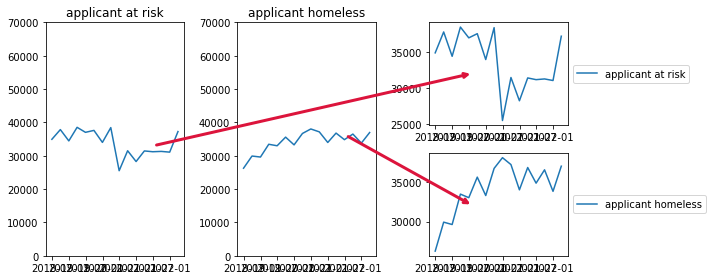

In [11]:
fig = plt.figure(tight_layout=True, figsize=(10,4))

gs = fig.add_gridspec(2,3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax31 = fig.add_subplot(gs[0,2])
ax32 = fig.add_subplot(gs[1,2])

chart_ylim = {}

# first 2 plots
original_plots = {ax1:'applicant at risk',ax2:'applicant homeless'}
for a,lab in original_plots.items():
    # data
    d_tmp = get_survey_results(joined)[lab]
    
    # plot line
    a.plot(d_tmp, label=lab)
    a.set_title(lab)

    # set ylimit
    mean_yval = get_survey_results(joined)[lab].mean()
    orders_mag = len(str(int(mean_yval))) - 1
    y_lim_rounded = round(mean_yval * 2, - orders_mag)
    chart_ylim[lab] = y_lim_rounded
    
    a.set_ylim(0, chart_ylim[lab])
    

# ZOOMED IN subplots
zoomed_plots = {ax31:'applicant at risk',ax32:'applicant homeless'}
for a,lab in zoomed_plots.items():
    # data
    d_tmp = get_survey_results(joined)[lab]
    
    # plot line
    a.plot(d_tmp)
    
    # legend
    a.legend([lab], loc='center left',bbox_to_anchor=[1,0.5])
    
    # connection arrows:
    draw_from = {v:k for k,v in original_plots.items()}.get(lab)
    y_arrow_pos = d_tmp.iloc[-3:].mean() / chart_ylim[lab]
    con = mpl.patches.ConnectionPatch(xyA=(0.8,y_arrow_pos), xyB=(0.3,0.5), 
                                      coordsA='axes fraction', coordsB='axes fraction',
                                      axesA=draw_from, axesB=a,
                                     arrowstyle='->', color="crimson", lw=3)
    fig.add_artist(con)

fig.show()

In [ ]:
plt.style.available

In [ ]:

for sty in plt.style.available:
    plt.style.use(sty)
    fig = plt.figure(tight_layout=True, figsize=(8,8))

    gs = fig.add_gridspec(5,5)

    ax1 = fig.add_subplot(gs[:2,:2])
    ax2 = fig.add_subplot(gs[2:,2:])

    tmp_d = get_survey_results(joined)['applicant homeless']
    ax1.plot(tmp_d)

    # set ylimit
    mean_yval = tmp_d.mean()
    orders_mag = len(str(int(mean_yval))) - 1
    y_lim_rounded = round(mean_yval * 2, - orders_mag)
    ax1.set_ylim(0, y_lim_rounded)

    ax2.plot(tmp_d)

    arc_style = mpl.patches.ConnectionStyle.Arc3(rad=-0.2)
    con = mpl.patches.ConnectionPatch(xyA=(0.9,0.2),
        xyB=(0.2,0.9),
        coordsA='axes fraction',
        coordsB='axes fraction',
        axesA=ax1,
        axesB=ax2,
        arrowstyle='->',
        connectionstyle=arc_style)
    fig.add_artist(con)

    ax1.set_title('equal yscale from zero')
    ax2.set_title('zoomed in')

    #annotate in the blank spaces around the charts
    ax3 = fig.add_subplot(gs[:2,2:])
    ax3.set_axis_off()
    ax3.annotate('Zooming in reveals more detail',
                 xy=(0,0.2), xycoords='axes fraction')

    ax2.annotate('Applicant\'s that met criteria \nfor being Homeless',
                 xy=(0.5,0.4), xycoords='axes fraction')
    fig.suptitle(sty)
    fig.show()

In [ ]:
ax3.set_axis_off()

In [ ]:
ax3.tick_params(grid_alpha=0)

In [ ]:
l.set_alpha(0)

In [ ]:
ax.annotate()

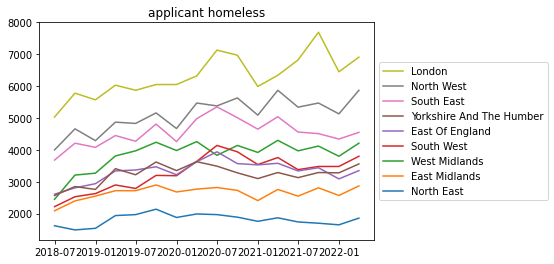

In [12]:
fig,ax = plt.subplots()
with plt.style.context('seaborn-colorblind'):
    macro_regions = joined[joined.region_type=='2 Regions'].groupby('LA_Name').sum().sort_values(
    'Total households assessed as owed a duty').index
    
    for k,v in {x: get_survey_results(joined,la_name=x) for x in macro_regions}.items():
        plt.plot(v['applicant homeless'],label=k)

    ax.set_title('applicant homeless')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=[1,0.5])

PRE COVID

In [ ]:
def rescale_min_max(x):
    min_val = x.min()
    max_val = x.max()
    return (x - min_val) / (max_val - min_val)

eng = joined[joined['LA_Name'] == 'England'].sort_values('period_end')
rescale_min_max(eng['Total number of households assessed1,2']).plot(label='ENG')

lond = joined[(joined['LA_Name'] == 'London') & (joined['region_type'] == '2 Regions')].sort_values('period_end')
rescale_min_max(lond['Total number of households assessed1,2']).plot(label='LOND')

plt.legend()

In [ ]:
# with open('region_lookup.json','r') as f:
#     region_lookup = json.load(f)